In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
import seaborn as sns

# Parte 1: 

<h2>Nessa parte será realizado as seguintes estapas:</h3>
<ul>
    <li>Importação dos dados aleatórios;</li>
    <li>Segmentação dos dados utilizando a técnica de PCA com o número de componentes ideal;</li>
    <li>Segmentação dos dados utilizando a técnica de PCA com o número de dois componentes apenas;</li>
    <li>Criação de um dataset com a rotulação e classe geradas pelo Modelo K-Means</li>
    <li>Treino e teste com modelos de Machine Learning (Gradient Boos, Random Forest, Decison Tree Classifier e Ada Boost).</li>    
</ul>

## Importação dados aleatorios

In [ ]:
df_ale = pd.read_csv('dados_aleatorios.csv', sep=',')
df_ale.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
x_ale = df_ale.copy()
x_ale.head()

,idade,gg,gs,mp,per,ts%,threepar,ftr,orb%,drb%,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,30,36.500000,20.0,1290.888889,9.200000,0.511200,0.324333,0.560500,5.400000,12.700000,...,0.65500,31.000000,106.000000,453.714286,15.000000,29.000000,0.800000,49.500000,128.111111,742.769231
1,28,63.600000,8.0,1290.000000,5.500000,0.480750,0.167000,0.329100,9.800000,19.357143,...,0.73320,3.000000,37.000000,1.000000,59.250000,17.000000,76.000000,45.454545,114.500000,328.357143
2,26,43.000000,22.0,133.500000,12.033333,0.508333,0.064000,0.283615,7.928571,13.311111,...,0.76275,68.250000,75.000000,84.000000,177.000000,5.200000,2.333333,42.000000,20.000000,475.214286
3,21,67.923077,8.0,2000.833333,14.000000,0.476000,0.011250,0.208667,5.600000,7.683333,...,0.70150,38.000000,46.571429,305.125000,10.750000,10.000000,14.333333,39.000000,195.800000,728.533333
4,24,21.800000,0.0,875.333333,11.540000,0.467000,0.021000,0.532000,14.400000,11.600000,...,0.78650,37.416667,37.400000,169.285714,94.166667,7.857143,11.000000,74.105263,202.750000,90.000000


## Segmentação dos dados utilizando a técnica de PCA com o número de componentes ideal

In [ ]:
#testar diferentes valores para o `n_components` -> por padrão irá testar todos os componentes se não especificar
pca_ale = PCA()

In [ ]:
pca_dados_ale = pca_ale.fit_transform(x_ale)

In [ ]:
#para sumprimir o uso de notações científicas
np.set_printoptions(precision = 2, suppress = True)

In [ ]:
pca_ale.explained_variance_

array([479978.05, 118758.5 ,  80879.67,  68862.8 ,  25288.71,  17221.41,
        15266.69,   9775.43,   8840.28,   8128.84,   6325.5 ,   4413.97,
         4102.32,   1649.35,   1607.98,    586.89,    548.81,    487.76,
          460.13,    235.48,     59.54,     40.18,     36.5 ,     34.9 ,
           24.32,     21.28,     19.21,     18.13,     12.23,      6.95,
            4.1 ,      3.97,      1.79,      1.73,      0.92,      0.76,
            0.56,      0.05,      0.02,      0.02,      0.01,      0.01,
            0.01,      0.01,      0.01,      0.01])

In [ ]:
len(pca_ale.explained_variance_)

46

In [ ]:
variancia_explicada = np.around(pca_ale.explained_variance_ratio_, 2)*100
variancia_explicada

array([56., 14.,  9.,  8.,  3.,  2.,  2.,  1.,  1.,  1.,  1.,  1.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.])

**Nos quatros primeiros elementos 56., 14.,  9.,  8 explica a grande parte do dataset, logo o número de componentes será de 4 (n_components)**

### Escalonando dados aleatorios

In [ ]:
scaler = StandardScaler()
scaler.fit(x_ale)
x_ale_v1 = scaler.transform(x_ale)
x_ale_v1 = pd.DataFrame(x_ale_v1, columns=x_ale.keys())
x_ale_v1.head()

,idade,gg,gs,mp,per,ts%,threepar,ftr,orb%,drb%,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,1.789235,-0.186382,0.483342,0.659951,-0.270802,0.466867,1.238769,1.008787,-0.189011,-0.091263,...,-0.313666,-0.251336,0.047704,1.906217,-0.643551,0.046577,-0.669547,-0.068201,0.662819,1.190559
1,1.031257,1.039465,-0.297765,0.658668,-0.882801,0.162416,0.226190,-0.029514,0.763310,1.033882,...,0.262993,-0.943776,-0.717224,-0.940813,-0.172996,-0.449000,2.833524,-0.168500,0.457963,-0.012097
2,0.273278,0.107640,0.613527,-1.010755,0.197847,0.438205,-0.436706,-0.233605,0.358265,0.012023,...,0.480900,0.669857,-0.295959,-0.418843,1.079160,-0.936317,-0.598119,-0.254149,-0.964330,0.414094
3,-1.621667,1.235015,-0.297765,1.684765,0.523144,0.114923,-0.776199,-0.569903,-0.145724,-0.939146,...,0.029232,-0.078226,-0.611116,0.971768,-0.688746,-0.738086,-0.039118,-0.328528,1.681585,1.149246
4,-0.484700,-0.851325,-0.818502,0.060091,0.116247,0.024938,-0.713449,0.880906,1.758919,-0.277178,...,0.656036,-0.092652,-0.712790,0.117502,0.198309,-0.826582,-0.194396,0.541838,1.786188,-0.703828


In [ ]:
pca_ale = PCA(n_components=4)
pca_dados_ale = pca_ale.fit_transform(x_ale_v1)

### Metodo cotovelo

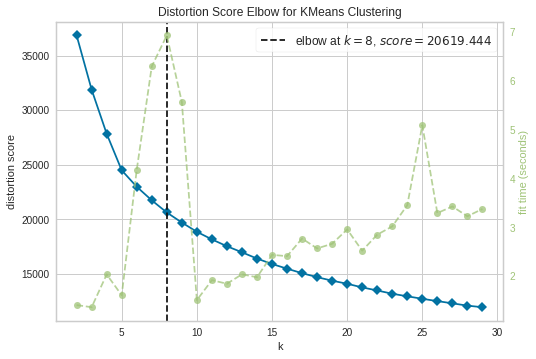

In [ ]:
#Elbow method
kmeans_dadospca_elbow = KMeans(random_state=42)

grafico = KElbowVisualizer(kmeans_dadospca_elbow, k=(2,30))
grafico.fit(pca_dados_ale)        
grafico.show() 

In [ ]:
kmeans_dados_final = KMeans(n_clusters =8, random_state=42)
rotulos_kmeans_final = kmeans_dados_final.fit_predict(x_ale_v1)
rotulos_kmeans_final

array([3, 0, 2, ..., 6, 2, 2], dtype=int32)

### Grafico de espalhamento

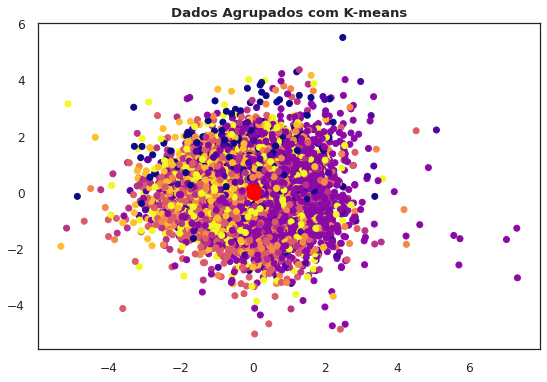

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)

#plot dos agrupamentos
plt.scatter(x=pca_dados_ale[:,0], y=pca_dados_ale[:, 2], c=rotulos_kmeans_final, cmap='plasma')

#plot dos centroides
plt.scatter(kmeans_dados_final.cluster_centers_[:, 0], 
            kmeans_dados_final.cluster_centers_[:, 2], 
            s=100,                             
            c='red') 

plt.title('Dados Agrupados com K-means',fontweight='bold')
plt.show()

## Segmentação dos dados utilizando a técnica de PCA com o número de dois componentes apenas;

### Redução para duas dimensões (0 ou 1)

In [ ]:
pca_ale_n2 = PCA(n_components=4)
pca_dados_ale_n2 = pca_ale.fit_transform(x_ale_v1)

In [ ]:
kmeans_dados_final_n2 = KMeans(n_clusters =2, random_state=42)
rotulos_kmeans_final_n2 = kmeans_dados_final_n2.fit_predict(x_ale_v1)
rotulos_kmeans_final_n2

array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

### Grafico de espalhamento

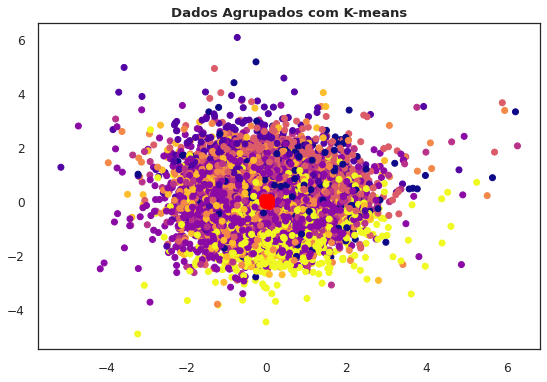

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)

#plot dos agrupamentos
plt.scatter(x=pca_dados_ale_n2[:,0], y=pca_dados_ale_n2[:, 1], c=rotulos_kmeans_final, cmap='plasma')

#plot dos centroides
plt.scatter(kmeans_dados_final.cluster_centers_[:, 0], 
            kmeans_dados_final.cluster_centers_[:, 2], 
            s=100,                             
            c='red') 

plt.title('Dados Agrupados com K-means',fontweight='bold')
plt.show()

## Criação de um dataset com a rotulação e classe geradas pelo Modelo K-Means

In [ ]:
df_ale_v2 = df_ale.copy()

### Criação coluna rotulos (segmentação)

In [ ]:
df_ale_v2['rotulos'] = rotulos_kmeans_final

### Criação coluna classe (Se é bom ou ruim)

In [ ]:
df_ale_v2['classe'] = rotulos_kmeans_final_n2

### Verificação

In [ ]:
df_ale_v2.head()

,idade,gg,gs,mp,per,ts%,threepar,ftr,orb%,drb%,...,drb,trb,ast,stl,blk,tov,pf,pts,rotulos,classe
0,30,36.500000,20.0,1290.888889,9.200000,0.511200,0.324333,0.560500,5.400000,12.700000,...,106.000000,453.714286,15.000000,29.000000,0.800000,49.500000,128.111111,742.769231,3,1
1,28,63.600000,8.0,1290.000000,5.500000,0.480750,0.167000,0.329100,9.800000,19.357143,...,37.000000,1.000000,59.250000,17.000000,76.000000,45.454545,114.500000,328.357143,0,1
2,26,43.000000,22.0,133.500000,12.033333,0.508333,0.064000,0.283615,7.928571,13.311111,...,75.000000,84.000000,177.000000,5.200000,2.333333,42.000000,20.000000,475.214286,2,1
3,21,67.923077,8.0,2000.833333,14.000000,0.476000,0.011250,0.208667,5.600000,7.683333,...,46.571429,305.125000,10.750000,10.000000,14.333333,39.000000,195.800000,728.533333,2,1
4,24,21.800000,0.0,875.333333,11.540000,0.467000,0.021000,0.532000,14.400000,11.600000,...,37.400000,169.285714,94.166667,7.857143,11.000000,74.105263,202.750000,90.000000,6,0


## Treino e teste com modelos de Machine Learning (Gradient Boos, Random Forest, Decison Tree Classifier e Ada Boost)

### Seperação entre features e classe (X e Y)

In [ ]:
x = df_ale_v2.drop(['classe'], axis=1).copy()
x.head(1)

,idade,gg,gs,mp,per,ts%,threepar,ftr,orb%,drb%,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,rotulos
0,30,36.5,20.0,1290.888889,9.2,0.5112,0.324333,0.5605,5.4,12.7,...,31.0,106.0,453.714286,15.0,29.0,0.8,49.5,128.111111,742.769231,3


In [ ]:
y = df_ale_v2['classe']
y

0       1
1       1
2       1
3       1
4       0
       ..
9994    1
9995    1
9996    0
9997    1
9998    1
Name: classe, Length: 9999, dtype: int32

### Escolonamento das Features

In [ ]:
scaler = StandardScaler()
scaler.fit(x)
x_v1 = scaler.transform(x)
x_v1 = pd.DataFrame(x_v1, columns=x.keys())
x_v1.head(1)

,idade,gg,gs,mp,per,ts%,threepar,ftr,orb%,drb%,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,rotulos
0,1.789235,-0.186382,0.483342,0.659951,-0.270802,0.466867,1.238769,1.008787,-0.189011,-0.091263,...,-0.251336,0.047704,1.906217,-0.643551,0.046577,-0.669547,-0.068201,0.662819,1.190559,-0.209369


### Verificação BASELINE e ACURACIA

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

SEED = 150993
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x_v1, y, test_size = 0.3, stratify = y)

modelo = RandomForestClassifier(n_estimators=100)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes)*100
print(f'A acuracia do modelo é {acuracia:.2f}%')

A acuracia do modelo é 97.67%


In [ ]:
from sklearn.dummy import DummyClassifier

SEED = 150993
np.random.seed(SEED)

dummy = DummyClassifier()
dummy.fit(treino_x, treino_y)
acuracia_dum = dummy.score(teste_x, teste_y)*100
print(f'A Baseline do modelo é {acuracia_dum:.2f}%')

A Baseline do modelo é 80.63%


### Vericação por correlação

In [ ]:
dados_cor = pd.concat([x_v1, y], axis=1)

In [ ]:
matriz_correlacao = dados_cor.corr()
#plt.figure(figsize=(30,25))
#sns.heatmap(matriz_correlacao, annot=True, fmt = ".1f")

In [ ]:
matriz_correlacao_v1 = matriz_correlacao[matriz_correlacao > 0.99]
matriz_correlacao_v2 = matriz_correlacao_v1.sum()
variaveis_correlacao = matriz_correlacao_v2[matriz_correlacao_v2 > 1]
variaveis_correlacao

Series([], dtype: float64)

### Teste com os modelos de MACHINE LEARNING SUPERVISIONADO

#### Criação da função

In [ ]:
registros_acuracia = []
registros_recall = []
registros_auc = []
registros_f1_micro = []
registros_f1_macro = []
registros_precision = []
index = []
registros_baseline = []

def treino_teste_reducao(x, y, modelo_estimado, nome_modelo):
    import numpy as np
    from sklearn.feature_selection import RFECV
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import roc_curve
    from sklearn.metrics import auc
    from sklearn.metrics import f1_score
    from sklearn.metrics import precision_score

    SEED = 5
    np.random.seed(SEED)

    treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.3)

    modelo = modelo_estimado
    
    features_rfecv = RFECV(estimator = modelo, cv = 5, step =1, scoring='accuracy')
    features_rfecv.fit(treino_x, treino_y)
    treino_rfecv = features_rfecv.transform(treino_x)
    teste_rfecv = features_rfecv.transform(teste_x)

    modelo.fit(treino_rfecv, treino_y)
    previsoes = modelo.predict(teste_rfecv)

    taxa_de_acuracia = accuracy_score(teste_y, previsoes) * 100
    taxa_de_recall = recall_score(teste_y, previsoes)
    fpr, tpr, thresholds = roc_curve(teste_y, previsoes)
    taxa_de_auc = auc(fpr, tpr)
    taxa_de_f1_micro = f1_score(teste_y, previsoes, average='micro')
    taxa_de_f1_macro = f1_score(teste_y, previsoes, average='macro')
    taxa_precision = precision_score(teste_y, previsoes) 
    #taxa_baseline = modelo.score(teste_x, teste_y)*100

    registros_acuracia.append(taxa_de_acuracia)
    registros_recall.append(taxa_de_recall)
    registros_auc.append(taxa_de_auc)
    registros_f1_micro.append(taxa_de_f1_micro)
    registros_f1_macro.append(taxa_de_f1_macro)
    registros_precision.append(taxa_precision)
    #registros_baseline.append(taxa_baseline)    
    index.append(nome_modelo)
    

    print(f'Acuracia: {taxa_de_acuracia:.2f}%')
    print(f'A recall do modelo {nome_modelo} é de: {taxa_de_recall}')
    print(f'A auc do modelo {nome_modelo} é de: {taxa_de_auc}')
    print(f'A f1 micro do modelo {nome_modelo} é de: {taxa_de_f1_micro}')
    print(f'A f1 macro do modelo {nome_modelo} é de: {taxa_de_f1_macro}')
    print(f'A precision do modelo {nome_modelo} é de: {taxa_de_f1_macro}')
    #print(f'A baseline é de: {taxa_baseline}')
    print(f'O numero de features necessárias para este modelo são: {features_rfecv.n_features_}')
    print(f'As colunas escolhidas para chegar no melhor modelo é/são: {treino_x.columns[features_rfecv.support_]}')
    
    return [teste_y, previsoes, features_rfecv]
    #construir_matriz_confusao(teste_y, previsoes)
    #construir_acuracia_dimensoes(features_rfecv)

#### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

modelo_xgboost = GradientBoostingClassifier(n_estimators=100)
resultado = treino_teste_reducao(x_v1, y, modelo_xgboost, 'XGBoost')
teste_y = resultado[0]
previsoes = resultado[1]
features_rfecv = resultado[2]

Acuracia: 98.70%
A recall do modelo XGBoost é de: 0.993734335839599
A auc do modelo XGBoost é de: 0.9770651877217797
A f1 micro do modelo XGBoost é de: 0.987
A f1 macro do modelo XGBoost é de: 0.9797254830403666
A precision do modelo XGBoost é de: 0.9797254830403666
O numero de features necessárias para este modelo são: 8
As colunas escolhidas para chegar no melhor modelo é/são: Index(['ts%', 'ws%48%', 'vorp', 'fg', 'threep', 'threepa', 'ast', 'rotulos'], dtype='object')


#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

modelo_randomforest = RandomForestClassifier(n_estimators=100)
resultado = treino_teste_reducao(x_v1 , y, modelo_randomforest, 'Random Forest')
teste_y = resultado[0]
previsoes = resultado[1]
features_rfecv = resultado[2]

Acuracia: 98.50%
A recall do modelo Random Forest é de: 0.9920634920634921
A auc do modelo Random Forest é de: 0.9745796008172246
A f1 micro do modelo Random Forest é de: 0.985
A f1 macro do modelo Random Forest é de: 0.9766354129258088
A precision do modelo Random Forest é de: 0.9766354129258088
O numero de features necessárias para este modelo são: 9
As colunas escolhidas para chegar no melhor modelo é/são: Index(['ts%', 'ws%48%', 'vorp', 'threep', 'threepa', 'twopa', 'trb', 'ast',
       'rotulos'],
      dtype='object')


#### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

modelo_decisiontree = DecisionTreeClassifier()
resultado = treino_teste_reducao(x_v1 , y,modelo_decisiontree, 'Decision_Tree')
teste_y = resultado[0]
previsoes = resultado[1]
features_rfecv = resultado[2]

Acuracia: 97.33%
A recall do modelo Decision_Tree é de: 0.985797827903091
A auc do modelo Decision_Tree é de: 0.9549451185720075
A f1 micro do modelo Decision_Tree é de: 0.9733333333333334
A f1 macro do modelo Decision_Tree é de: 0.9583333333333333
A precision do modelo Decision_Tree é de: 0.9583333333333333
O numero de features necessárias para este modelo são: 13
As colunas escolhidas para chegar no melhor modelo é/são: Index(['ftr', 'stl%', 'ws', 'ws%48%', 'vorp', 'fg', 'threep', 'threepa',
       'twop%', 'trb', 'blk', 'tov', 'pts'],
      dtype='object')


#### Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

modelo_adaboost = AdaBoostClassifier()
resultado = treino_teste_reducao(x_v1, y,modelo_adaboost, 'Ada_Boost')
teste_y = resultado[0]
previsoes = resultado[1]
features_rfecv = resultado[2]

Acuracia: 98.60%
A recall do modelo Ada_Boost é de: 0.9945697577276524
A auc do modelo Ada_Boost é de: 0.9733574861245523
A f1 micro do modelo Ada_Boost é de: 0.986
A f1 macro do modelo Ada_Boost é de: 0.9780701143695749
A precision do modelo Ada_Boost é de: 0.9780701143695749
O numero de features necessárias para este modelo são: 8
As colunas escolhidas para chegar no melhor modelo é/são: Index(['ws%48%', 'threep', 'threepa', 'ft%', 'trb', 'ast', 'blk', 'tov'], dtype='object')


In [ ]:
resultado_a = pd.DataFrame(registros_acuracia,
                          index=index, 
                          columns=['Acuracia'])
resultado_b = pd.DataFrame(registros_recall,
                          index=index, 
                          columns=['recall'])
resultado_c = pd.DataFrame(registros_auc,
                          index=index, 
                          columns=['auc'])
resultado_d = pd.DataFrame(registros_f1_micro,
                          index=index, 
                          columns=['f1_micro'])
resultado_e = pd.DataFrame(registros_f1_macro,
                          index=index, 
                          columns=['f1_macro'])
resultado_f = pd.DataFrame(registros_precision,
                          index=index, 
                          columns=['precision'])
resultado = pd.concat([resultado_a, resultado_b, resultado_c, resultado_d, resultado_e, resultado_f], axis = 'columns')
resultado

,Acuracia,recall,auc,f1_micro,f1_macro,precision
XGBoost,98.700000,0.993734,0.977065,0.987000,0.979725,0.990012
Random Forest,98.500000,0.992063,0.974580,0.985000,0.976635,0.989171
Decision_Tree,97.333333,0.985798,0.954945,0.973333,0.958333,0.980881
Ada_Boost,98.600000,0.994570,0.973357,0.986000,0.978070,0.987967


# Parte 2

<h3>
    Nessa parte do projeto será realizado a validação do modelo:     
</h3>
<ul>
    <li>Importação dataset Real</li>
    <li>Segmentação dos jogadores com os dados reais, como feito nos testes;</li>
    <li>Segmentação dos jogadores com os dados reais, como feito nos testes em dois niveis;</li>
    <li>Redução de dimensionalidade com matriz de correlação e o RFECV</li>
    <li>Treinamento com todo o dataset gerado e predição com os dados reais.</li>    
</ul>

## Importação dataset Real

In [ ]:
arquivo_dateset_real = 'jogadores_agrupados.csv'
df_real = pd.read_csv(arquivo_dateset_real, sep=',')
df_real.drop(['Unnamed: 0'], axis=1, inplace=True)
df_real.head(1)

,jogador,idade,gg,gs,mp,per,ts%,threepar,ftr,orb%,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,A.C. Green,30,75.611111,50.277778,2169.111111,13.872222,0.543556,0.049,0.437111,10.388889,...,0.708056,198.666667,364.055556,562.722222,81.611111,61.277778,31.222222,83.777778,143.388889,718.222222


In [ ]:
x_real = df_real.drop('jogador', axis=1).copy()
x_real.head(1)

,idade,gg,gs,mp,per,ts%,threepar,ftr,orb%,drb%,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,30,75.611111,50.277778,2169.111111,13.872222,0.543556,0.049,0.437111,10.388889,18.811111,...,0.708056,198.666667,364.055556,562.722222,81.611111,61.277778,31.222222,83.777778,143.388889,718.222222


## Escalonamento dos dados

In [ ]:
scaler = StandardScaler()
scaler.fit(x_real)
x_real_v1 = scaler.transform(x_real)
x_real_v1 = pd.DataFrame(x_real_v1, columns=x_real.keys())
x_real_v1.head()

,idade,gg,gs,mp,per,ts%,threepar,ftr,orb%,drb%,...,ft%,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,1.793200,1.588100,2.455982,1.931628,0.485111,0.787747,-0.524981,0.502516,0.880143,0.980386,...,0.077105,3.824118,2.878667,2.561724,0.067997,1.366686,0.753540,0.768683,0.888704,1.117377
1,-0.850937,-1.484986,-0.818768,-1.119121,-1.790210,-2.676670,-0.841282,-1.571118,3.281340,0.926420,...,0.336037,-0.731217,-0.999846,-0.806940,-0.807337,-1.110756,-0.710029,-1.204758,-1.084300,-0.937807
2,-0.473203,1.583050,-0.232570,1.041471,0.114895,0.164980,-0.537892,-0.427826,-0.285075,-1.198476,...,0.565741,0.684191,-0.150870,0.037216,0.908771,0.019506,-0.147519,1.201645,0.890385,1.212227
3,-0.850937,-0.636541,-0.514813,-0.606348,-1.030293,-1.363632,1.553563,-1.246948,-1.035155,-1.623455,...,0.736167,-0.845100,-0.897604,-0.777867,-0.281779,-0.877853,-0.522526,-0.773153,-0.988466,-0.534616
4,-0.473203,-0.848652,-0.818768,-0.971511,-0.387287,0.086589,0.695034,0.687003,-0.178932,1.342726,...,-1.835040,-0.828831,-0.802665,-0.719721,-0.764434,-1.110756,-0.100643,-1.033744,-0.963247,-0.822058


## Segmentação dos jogadores com os dados reais, como feito nos testes

In [ ]:
pca_real = PCA(n_components=4)
pca_dados_real = pca_real.fit_transform(x_real_v1)

In [ ]:
kmeans_dados_final_real = KMeans(n_clusters =8, random_state=42)
rotulos_kmeans_final_real = kmeans_dados_final_real.fit_predict(x_real_v1)
rotulos_kmeans_final_real

array([2, 6, 5, ..., 4, 4, 7], dtype=int32)

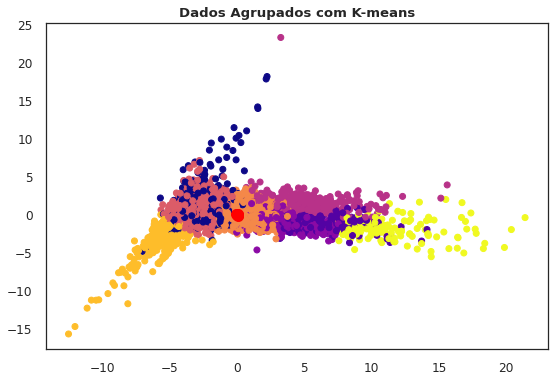

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)

#plot dos agrupamentos
plt.scatter(x=pca_dados_real[:,0], y=pca_dados_real[:, 2], c=rotulos_kmeans_final_real, cmap='plasma')

#plot dos centroides
plt.scatter(kmeans_dados_final.cluster_centers_[:, 0], 
            kmeans_dados_final.cluster_centers_[:, 2], 
            s=100,                             
            c='red') 

plt.title('Dados Agrupados com K-means',fontweight='bold')
plt.show()

## Segmentação dos jogadores com os dados reais, como feito nos testes em dois niveis

In [ ]:
pca_real_n2 = PCA(n_components=4)
pca_dados_real_n2 = pca_real_n2.fit_transform(x_real_v1)

In [ ]:
kmeans_dados_final_real_n2 = KMeans(n_clusters =2, random_state=42)
rotulos_kmeans_final_real_n2 = kmeans_dados_final_real_n2.fit_predict(x_real_v1)
rotulos_kmeans_final_real_n2

array([0, 1, 0, ..., 1, 1, 0], dtype=int32)

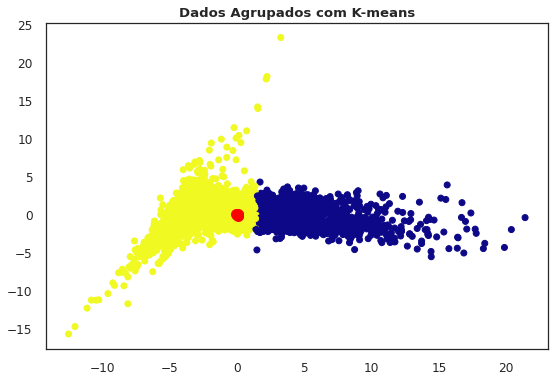

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)

#plot dos agrupamentos
plt.scatter(x=pca_dados_real_n2[:,0], y=pca_dados_real_n2[:, 2], c=rotulos_kmeans_final_real_n2, cmap='plasma')

#plot dos centroides
plt.scatter(kmeans_dados_final.cluster_centers_[:, 0], 
            kmeans_dados_final.cluster_centers_[:, 2], 
            s=100,                             
            c='red') 

plt.title('Dados Agrupados com K-means',fontweight='bold')
plt.show()

## Criação de um dataset com a rotulação e classe geradas pelo Modelo K-Means

In [ ]:
df_real_v2 = df_real.copy()

In [ ]:
df_real_com_posicao = pd.read_csv('jogadores_agrupados_por_posicao.csv', sep=',')
df_real_com_posicao.drop(['Unnamed: 0'], axis=1, inplace=True)

### Criação da coluna de rotulos

In [ ]:
#Sem posicao
df_real_v2['rotulos'] = rotulos_kmeans_final_real

In [ ]:
#com posicao
df_real_com_posicao['rotulos'] = rotulos_kmeans_final_real

### Criação da coluna de classe

In [ ]:
df_real_v2['classe'] = rotulos_kmeans_final_real_n2

In [ ]:
#com posicao
df_real_com_posicao['classe'] = rotulos_kmeans_final_real_n2

### Verificação

In [ ]:
df_real_v2.head()

,jogador,idade,gg,gs,mp,per,ts%,threepar,ftr,orb%,...,drb,trb,ast,stl,blk,tov,pf,pts,rotulos,classe
0,A.C. Green,30,75.611111,50.277778,2169.111111,13.872222,0.543556,0.049,0.437111,10.388889,...,364.055556,562.722222,81.611111,61.277778,31.222222,83.777778,143.388889,718.222222,2,0
1,A.J. Bramlett,23,8.000000,0.000000,61.000000,-0.400000,0.190000,0.000,0.000000,21.700000,...,10.000000,22.000000,0.000000,1.000000,0.000000,3.000000,13.000000,8.000000,6,1
2,A.J. English,24,75.500000,9.000000,1554.000000,11.550000,0.480000,0.047,0.241000,4.900000,...,87.500000,157.500000,160.000000,28.500000,12.000000,101.500000,143.500000,751.000000,5,0
3,A.J. Guyton,23,26.666667,4.666667,415.333333,4.366667,0.324000,0.371,0.068333,1.366667,...,19.333333,26.666667,49.000000,6.666667,4.000000,20.666667,19.333333,147.333333,4,1
4,A.J. Hammons,24,22.000000,0.000000,163.000000,8.400000,0.472000,0.238,0.476000,5.400000,...,28.000000,36.000000,4.000000,1.000000,13.000000,10.000000,21.000000,48.000000,0,1


### Separação dos X e Y de predição e X e Y de Teste 

<h3>Informações das variáveis:
    <b><ul>
        <li>x_real = X de Predição ~~> Dados Reais</li>
        <li>y_real = Y de Predição ~~> Dados Reais</li>
        <br>
        <li>x_teste = X de Treino  ~~> Dados Gerados</li>
        <li>y_teste = Y de Treino  ~~> Dados Gerados</li>
    </ul></b>
</h3>

In [ ]:
x_real = df_real_v2.drop(['jogador'], axis=1).copy()
x_real.drop(['classe'], axis=1, inplace=True)
x_real.head(1)

,idade,gg,gs,mp,per,ts%,threepar,ftr,orb%,drb%,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,rotulos
0,30,75.611111,50.277778,2169.111111,13.872222,0.543556,0.049,0.437111,10.388889,18.811111,...,198.666667,364.055556,562.722222,81.611111,61.277778,31.222222,83.777778,143.388889,718.222222,2


In [ ]:
scaler = StandardScaler()
scaler.fit(x_real)
x_real_v1 = scaler.transform(x_real)
x_real_v1 = pd.DataFrame(x_real_v1, columns=x_real.keys())
x_real_v1 = x_real_v1[['ts%', 'ws%48%', 'vorp', 'fg', 'threep', 'threepa', 'ast', 'rotulos']]
x_real_v1.head(1)

,ts%,ws%48%,vorp,fg,threep,threepa,ast,rotulos
0,0.787747,0.740121,1.483135,1.049224,-0.190651,-0.104369,0.067997,-0.70592


In [ ]:
y_real = df_real_v2['classe'].copy()

In [ ]:
y_treino = y.copy()

In [ ]:
x_treino = x_v1[['ts%', 'ws%48%', 'vorp', 'fg', 'threep', 'threepa', 'ast', 'rotulos']].copy()
x_treino.head(1)

,ts%,ws%48%,vorp,fg,threep,threepa,ast,rotulos
0,0.466867,6.720259,-0.249842,-0.807794,-0.335713,-0.552198,-0.643551,-0.209369


## Validação Machine Learning Supervisionado

### Redução de dimensionalidade e Treino do modelo

In [ ]:
import numpy as np
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

SEED = 5
np.random.seed(SEED)

#treino_x, teste_x, treino_y, teste_y = train_test_split(x_dimensionado, dados_validacao_y, test_size = 0.3)

# COLOCAR O MODELO VENCENDOR!
#modelo = DecisionTreeClassifier(n_estimators=100)
modelo = GradientBoostingClassifier(n_estimators=100)
#        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

# COLOCAR AS FEATURES QUE FORAM SELECIONADAS
modelo.fit(x_treino, y_treino)
#                       ^^^^^^^^^^^^^^^^^^^^
previsao = modelo.predict(x_real_v1)

taxa_de_acuracia = accuracy_score(y_real, previsao) * 100
taxa_de_recall = recall_score(y_real, previsao) 
fpr, tpr, thresholds = roc_curve(y_real, previsao) 
taxa_de_auc = auc(fpr, tpr) 
taxa_de_f1_micro = f1_score(y_real, previsao, average='micro')
taxa_de_f1_macro = f1_score(y_real, previsao, average='macro')
taxa_precision = precision_score(y_real, previsao)

print(f'Acuracia do modelo de validação é de: {taxa_de_acuracia:.2f}%')
print(f'A recall do modelo validação é de: {taxa_de_recall * 100:.2f}')
print(f'A auc do modelo validação é de: {taxa_de_auc * 100:.2f}')
print(f'A f1 micro do modelo validação é de: {taxa_de_f1_micro * 100:.2f}')
print(f'A f1 macro do modelo validação é de: {taxa_de_f1_macro * 100:.2f}')
print(f'A precision do modelo validação é de: {taxa_precision * 100:.2f}')

Acuracia do modelo de validação é de: 74.14%
A recall do modelo validação é de: 92.61
A auc do modelo validação é de: 62.46
A f1 micro do modelo validação é de: 74.14
A f1 macro do modelo validação é de: 63.30
A precision do modelo validação é de: 75.60


In [ ]:
dicionario_resultado = {
    'acuracia': f'{taxa_de_acuracia:.2f}'
    ,'recall': f'{taxa_de_recall * 100:.2f}'
    ,'AUC': f'{taxa_de_auc * 100:.2f}'
    ,'F1 Micro': f'{taxa_de_f1_micro * 100:.2f}'
    ,'F1 Macro': f'{taxa_de_f1_macro * 100:.2f}'
    ,'Precision': f'{taxa_precision * 100:.2f}'
}

In [ ]:
pd.DataFrame(dicionario_resultado.values(), index=dicionario_resultado, columns=['Resultado em %'])

,Resultado em %
acuracia,74.14
recall,92.61
AUC,62.46
F1 Micro,74.14
F1 Macro,63.30
Precision,75.60


## Colocando a classificação e rotulamento por jogador

In [ ]:
df_real_v2.to_csv('resultado_final.csv', sep=',')

In [ ]:
df_real_com_posicao.to_csv('resultado_final_com_posicao.csv', sep=',')